### Script for generating the brain-behavior figure

In [1]:
import numpy as np
import h5py 
import pandas as pd
import pickle
import sys
sys.path.append('./../../Code/02_PLSC_analysis/')
from plot import *
import pandas as pd
from scipy.io import loadmat
import tqdm
import seaborn as sns
import matplotlib as mpl

In [2]:
Ylabel=['Episodic memory',
 'Executive function',
 'Fluid Intelligence',
 'Language',
 'Processing Speed',
 'Self-regulation/Inpulsivity',
 'Spatial Orientation',
 'Sustained visual attention',
 'Verbal episodic memory',
 'Working Memory']

# Load bootstrapped data 

In [3]:
data_behaviour_covariance_all={i:[] for i in ['BOLD',
                                              'edges',
                                              'triangles',
                                              'scaffold']}

In [4]:
folder_results='./../../Results/pkl/'
current_measure=[]
for l in tqdm.tqdm(range(100)):
    type_="BOLD"
    data_original=folder_results+"pls_res_%s_ALL_iter%d.pkl" % (type_,l)
    data_perm=folder_results+"perm_res_%s_ALL_iter%d.pkl" % (type_,l)
    #data_boot=folder_results+"boot_res_%s_ALL_iter%d.pkl" % (type_,l)
    pls = pd.read_pickle(data_original)
    perm = pd.read_pickle(data_perm)
    #boot = pd.read_pickle(data_boot)
    covar_explained=np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]])
    #print(l,np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]]))
    current_measure.append(covar_explained)
data_behaviour_covariance_all[type_]=current_measure

100%|██████████| 100/100 [00:13<00:00,  7.46it/s]


In [7]:
fname_edges="./../../Results/edges_explained_covariance_all.npy"
with open(fname_edges,'rb') as f:
    data_behaviour_covariance_all["edges"]=np.load(f)

In [8]:
folder_results='./../../Results/pkl/'
current_measure=[]
for l in tqdm.tqdm(range(100)):
    type_="scaffold"
    data_original=folder_results+"pls_res_%s_ALL_iter%d.pkl" % (type_,l)
    data_perm=folder_results+"perm_res_%s_ALL_iter%d.pkl" % (type_,l)
    #data_boot=folder_results+"boot_res_%s_ALL_iter%d.pkl" % (type_,l)
    pls = pd.read_pickle(data_original)
    perm = pd.read_pickle(data_perm)
    #boot = pd.read_pickle(data_boot)
    covar_explained=np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]])
    #print(l,np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]]))
    current_measure.append(covar_explained)
data_behaviour_covariance_all[type_]=current_measure

100%|██████████| 100/100 [00:12<00:00,  8.18it/s]


In [9]:
folder_results='./../../Results/pkl/'
current_measure=[]
for l in tqdm.tqdm(range(100)):
    type_="triangles"
    data_original=folder_results+"pls_res_%s_ALL_iter%d.pkl" % (type_,l)
    data_perm=folder_results+"perm_res_%s_ALL_iter%d.pkl" % (type_,l)
    #data_boot=folder_results+"boot_res_%s_ALL_iter%d.pkl" % (type_,l)
    pls = pd.read_pickle(data_original)
    perm = pd.read_pickle(data_perm)
    #boot = pd.read_pickle(data_boot)
    covar_explained=np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]])
    #print(l,np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]]))
    current_measure.append(covar_explained)
data_behaviour_covariance_all[type_]=current_measure

100%|██████████| 100/100 [24:07<00:00, 14.48s/it]


Text(0, 0.5, 'Covariance Explained')

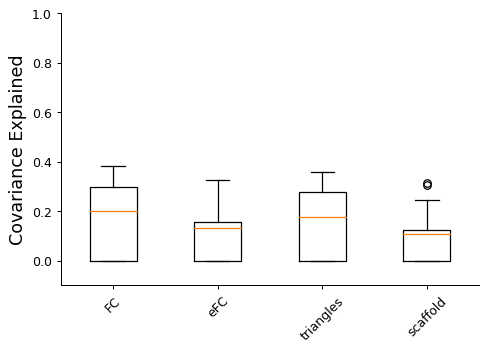

In [10]:
fig=plt.figure(dpi=90)


plt.boxplot([data_behaviour_covariance_all['BOLD'],
             data_behaviour_covariance_all['edges'],
             data_behaviour_covariance_all['triangles'],
             data_behaviour_covariance_all['scaffold'],
            ],labels=['FC','eFC','triangles','scaffold'])
sns.despine(fig=fig,right=True)
plt.xticks(rotation=45)
plt.ylim(-0.1,1)
plt.ylabel('Covariance Explained',fontsize=14)

# Local analysis - Yeo networks

In [11]:
data_behaviour_covariance_all_networks={}

for i in ['BOLD','edges', 'triangles', 'scaffold']:
    if i not in data_behaviour_covariance_all_networks:
        data_behaviour_covariance_all_networks[i]={}
    for j in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
        data_behaviour_covariance_all_networks[i][j]=[]

In [12]:
folder_results='./../../Results/pkl/'
TOTAL=100
for net in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
    for type_ in ['BOLD','triangles','scaffold']:
        current_measure=[]
        for l in tqdm.tqdm(range(TOTAL)):
            data_original=folder_results+f"pls_res_{type_}_{net}_iter{l}.pkl"
            data_perm=folder_results+f"perm_res_{type_}_{net}_iter{l}.pkl"
            #data_boot=folder_results+f"boot_res_{type_}_{net}_iter{l}.pkl"
            pls = pd.read_pickle(data_original)
            perm = pd.read_pickle(data_perm)
            #boot = pd.read_pickle(data_boot)
            covar_explained=np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]])
            #print(l,np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]]))
            current_measure.append(covar_explained)
        data_behaviour_covariance_all_networks[type_][net]=current_measure

100%|██████████| 100/100 [00:30<00:00,  3.33it/s]


In [13]:
folder_results='./../../Results/pkl/'
TOTAL=100
for net in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
    for type_ in ['BOLD','edges','triangles','scaffold']:
        current_measure=[]
        for l in tqdm.tqdm(range(TOTAL)):
            data_original=folder_results+f"pls_res_{type_}_{net}_iter{l}.pkl"
            data_perm=folder_results+f"perm_res_{type_}_{net}_iter{l}.pkl"
            #data_boot=folder_results+f"boot_res_{type_}_{net}_iter{l}.pkl"
            pls = pd.read_pickle(data_original)
            perm = pd.read_pickle(data_perm)
            #boot = pd.read_pickle(data_boot)
            covar_explained=np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]])
            #print(l,np.sum(varexp(pls['S'])[np.where(perm['P_val']<0.05)[0]]))
            current_measure.append(covar_explained)
        data_behaviour_covariance_all_networks[type_][net]=current_measure

100%|██████████| 100/100 [00:00<00:00, 141.93it/s]


In [14]:
map_labels={'BOLD':'FC',
            'edges':'eFC',
            'triangles': 'Triangles',
            'scaffold': 'Scaffold'}

In [15]:
# del data_behaviour_covariance_all_networks['edges']

In [16]:
method_list=[]
network_list=[]
value_list=[]
Niter=100
for net_ in['VIS','SM','DA','VA','L','FP','DMN','SC']:
    for method_ in data_behaviour_covariance_all_networks:

        #for network_ in data_behaviour_covariance_all_networks[method_]:
    #     data_all_networks['method'].append(data_behaviour_covariance_all_networks[method_]['VIS'])
        value_list.extend(data_behaviour_covariance_all_networks[method_][net_])
        network_list.extend([net_]*Niter)
        method_list.extend([map_labels[method_]]*Niter)
data_all_networks=pd.DataFrame()
data_all_networks['method']=method_list
data_all_networks['network']=network_list
data_all_networks['Covariance Explained']=value_list
order_indices=pd.Index(['FC','eFC','Triangles','Scaffold'])

In [17]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [18]:
list_my_palette=[]
for idx,i in enumerate(sns.color_palette("Paired")):
    if idx % 2 ==0 and idx <=6:
        list_my_palette.append(i)
for idx,i in enumerate(sns.color_palette("Paired")):
    if idx % 2 ==1 and idx <=6:
        list_my_palette.append(i)
mypalette=sns.color_palette(list_my_palette)# Set your custom color palette

mypalette_vivid=sns.color_palette(['#2C7BB6','green','#D7191C','#6a51a3'])# Set your custom color palette


def set_box_color(bp, color, lw, alpha_box):
    plt.setp(bp['boxes'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['whiskers'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['caps'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['medians'], color=color,linewidth=lw,alpha=alpha_box)


def new_adjust_box_widths(axes, fac=0.9):
    """
    Adjust the widths of a seaborn-generated boxplot or boxenplot.
    
    Notes
    -----
    - thanks https://github.com/mwaskom/seaborn/issues/1076
    """
    from matplotlib.patches import PathPatch
    from matplotlib.collections import PatchCollection
    
    if isinstance(axes, list) is False:
        axes = [axes]
    
    # iterating through Axes instances
    for ax in axes:

        # iterating through axes artists:
        for c in ax.get_children():
            # searching for PathPatches
            if isinstance(c, PathPatch) or isinstance(c, PatchCollection):
                if isinstance(c, PathPatch):
                    p = c.get_path()
                else:
                    p = c.get_paths()[-1]
            
                # getting current width of box:
#                 p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5 * (xmin + xmax)
                xhalf = 0.5 * (xmax - xmin)

                # setting new width of box
                xmin_new = xmid - fac * xhalf
                xmax_new = xmid + fac * xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    try:
                        if np.all(l.get_xdata() == [xmin, xmax]):
                            l.set_xdata([xmin_new, xmax_new])
                    except:
                        # /tmp/ipykernel_138835/916607433.py:32: DeprecationWarning: elementwise comparison failed;
                            # this will raise an error in the future.
                                # if np.all(l.get_xdata() == [xmin, xmax]):
                        pass
    pass

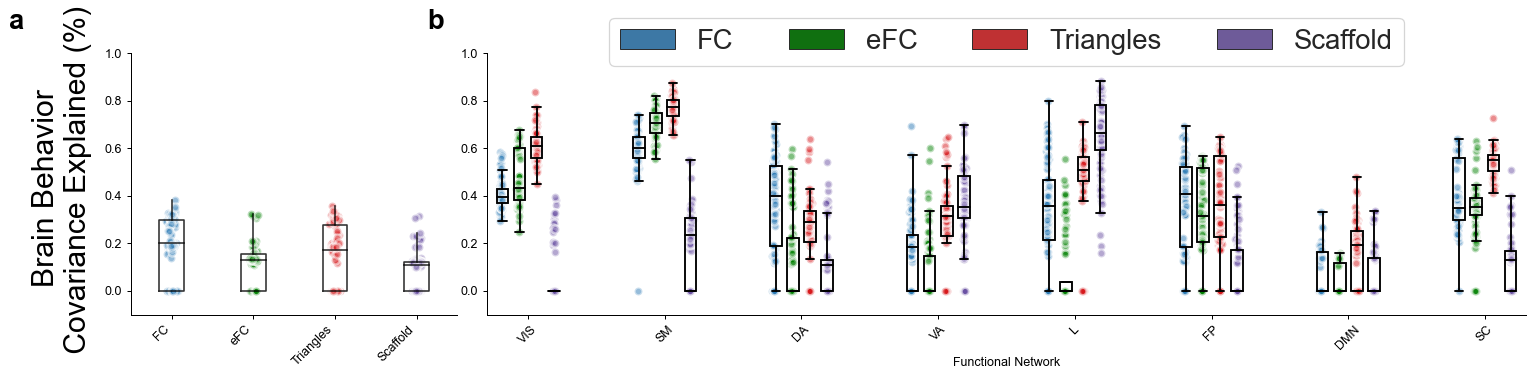

In [19]:
from matplotlib.gridspec import GridSpec
#import seaborn.objects as so
font = {'family': 'sans-serif',
        'fontname':'Arial',
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }

fig=plt.figure(dpi=90,figsize=(20,10))
gs = GridSpec(2, 8, figure=fig,hspace=0.6)

width_box=0.3
ax = fig.add_subplot(gs[0, 0:2])
blp=plt.boxplot([data_behaviour_covariance_all['BOLD'],
             data_behaviour_covariance_all['edges'],
             data_behaviour_covariance_all['triangles'],
             data_behaviour_covariance_all['scaffold']],labels=['FC','edges','triangles','scaffold'],
             widths=width_box, showfliers=False,showcaps=False)

alpha_box=0.8


alpha_val=0.5
size_marker=40
lw_box=1.3
#Triangle points
plt.scatter(np.random.normal(1.5-0.5,0.03,size=len(data_behaviour_covariance_all['BOLD'])),data_behaviour_covariance_all['BOLD'],
            s=size_marker,color='#2C7BB6',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

plt.scatter(np.random.normal(2.5-0.5,0.03,size=len(data_behaviour_covariance_all['edges'])),data_behaviour_covariance_all['edges'],
            s=size_marker,color='green',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)


plt.scatter(np.random.normal(3.5-0.5,0.03,size=len(data_behaviour_covariance_all['triangles'])),data_behaviour_covariance_all['triangles'],
            s=size_marker,color='#D7191C',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

plt.scatter(np.random.normal(4.5-0.5,0.03,size=len(data_behaviour_covariance_all['scaffold'])),data_behaviour_covariance_all['scaffold'],
            s=size_marker,color='#6a51a3',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

sns.despine(fig=fig,right=True)
plt.xticks([1,2,3,4],['FC','eFC','Triangles','Scaffold'],rotation=45,ha='right')
plt.ylim(-0.1,1)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.xlim(0.5,4.5)

plt.ylabel('Brain Behavior \n Covariance Explained (%)',fontsize=24,labelpad=10)


set_box_color(blp, 'black',lw_box,alpha_box) # colors are from http://colorbrewer2.org/
set_box_color(blp, 'black',lw_box,alpha_box)
set_box_color(blp, 'black',lw_box,alpha_box)


plt.text(x=-0.35,y=1.12,s="a", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes)


ax = fig.add_subplot(gs[0, 2:])
sns.set( font_scale=2)
sns.set_style("ticks")
data_all_networks_no_umap=data_all_networks[~data_all_networks.method.str.contains('UMAP',case=False)]
data_all_networks_umap=data_all_networks[data_all_networks.method.str.contains('UMAP',case=False)]

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

# order_indices=pd.Index(['BOLD','edges','triangles','scaffold','BOLD_UMAP','edges_UMAP','triangles_UMAP','scaffold_UMAP'])
order_indices=pd.Index(['FC','eFC','Triangles','Scaffold'])
# sns.boxplot(data=data_all_networks,x='method',y='Covariance Explained',hue='network',order=order_indices,showfliers = False)
sns.boxplot(data=data_all_networks_no_umap,x='network',y='Covariance Explained',hue='method',
            showfliers = False,hue_order=order_indices,width=0.5,
           palette=sns.color_palette(mypalette_vivid, 14),**PROPS)



# sns.stripplot(data=data_all_networks_no_umap, x='network',y='Covariance Explained',hue='method',
#               hue_order=order_indices, dodge=True, ax=ax,alpha=alpha_val,palette=sns.color_palette(mypalette_vivid, 4),
#               legend=False,clip_on=False,jitter=0.05,
#                marker='o', size=6, edgecolor='white', linewidth=1, color='white',zorder=-20)

for x_coord,network in zip([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],['VIS','SM','DA','VA','L','FP','DMN','SC']):
    plt.scatter(np.random.normal(x_coord-0.7,0.005,size=len(data_behaviour_covariance_all_networks['BOLD'][network])),data_behaviour_covariance_all_networks['BOLD'][network],
            s=size_marker,color='#2C7BB6',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.57,0.005,size=len(data_behaviour_covariance_all_networks['edges'][network])),data_behaviour_covariance_all_networks['edges'][network],
            s=size_marker,color='green',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.44,0.005,size=len(data_behaviour_covariance_all_networks['triangles'][network])),data_behaviour_covariance_all_networks['triangles'][network],
            s=size_marker,color='#D7191C',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.31,0.005,size=len(data_behaviour_covariance_all_networks['scaffold'][network])),data_behaviour_covariance_all_networks['scaffold'][network],
            s=size_marker,color='#6a51a3',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)



sns.despine(fig=fig,right=True)
# sns.set_style("ticks",{'axes.grid' : True})
#sns.set_style("whitegrid")

plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.xticks(rotation=45);
plt.xlim(-0.3,7.3)
plt.ylim(-0.1,1)
plt.ylabel("")
# adjust_box_widths(fig, 0.9)
plt.xlabel('Functional Network')

plt.text(x=-0.05,y=1.12,s="b", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes)

new_adjust_box_widths(ax,fac=0.7)
plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.9),ncol=4)

# ax = fig.add_subplot(gs[1,:])
# sns.set( font_scale=2)
# sns.set_style("ticks")
# sns.despine(fig=fig,right=True)
plt.savefig('Figure4_top.svg')




In [20]:

def plot_behav_correct(LC_indexes, x, U, bsr, std, color1, color2): 
    for i in LC_indexes:  
        c = [color1]*len(U[i])
        f, ax = plt.subplots(figsize=(6,3),dpi=150)
        features_sel, selected_indexes  = boot_select(i, bsr, U)
        modify_color(c, selected_indexes, color2)
        fig=plt.bar(x, np.array(U[i]), yerr=std[i], color= c,align="center")
        ax.set_ylabel(f"Loadings {i+1}")
        plt.xticks(rotation=35, fontsize=8,ha='right')


In [21]:
pp='./../../Results/pkl/'
list_saliences_mean=[]
list_saliences_std=[]
for net in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
    for type_ in ['BOLD','edges','triangles','scaffold']:
        list_current_saliences=[]
        for ID_iter in tqdm.tqdm(range(100)):
            data_original=pp+f"pls_res_{type_}_{net}_iter{ID_iter}.pkl"
            data_perm=pp+f"perm_res_{type_}_{net}_iter{ID_iter}.pkl"
            data_boot=pp+f"boot_res_{type_}_{net}_iter{ID_iter}.pkl"
            pls = pd.read_pickle(data_original)
            perm = pd.read_pickle(data_perm)
            boot = pd.read_pickle(data_boot)
            if len(perm['sig_LC']) !=0:
                var_explained = varexp(pls['S'])
                var_explained_significative = [var_explained[i] for i in perm['sig_LC']]
                index_LV_significant = np.argmax(var_explained_significative)
                current_saliences_max_LV=list(pls['U'][index_LV_significant])
                list_current_saliences.append(current_saliences_max_LV)
        #         print(index_LV_significant,)
        #         print("Number of significant components: ", perm['sig_LC'],np.argmax(var_explained_significative))
            #     list_saliences.append(np.array(pls['U'][]))
#                 print(current_saliences_max_LV)
        list_saliences_mean.append(np.nanmean(np.array(list_current_saliences),axis=0))
        list_saliences_std.append(np.nanstd(np.array(list_current_saliences),axis=0))

100%|██████████| 100/100 [00:01<00:00, 98.51it/s]


In [68]:
def boot_select(LC_index, boot_res, X, level=3): 
    """
   
    Select the important behavioral scores based on the boot stability scores
    
    Inputs
    -------
    LC_index : int
        integer indices of the latent variables
    boot_res : pandas DataFrame
        Dataframe with the bootstrap stability scores
    X : pandas DataFrame
        Dataframe with the original input data
    level : float
        The cutoff threshold for selecting voxels
    
    Ouput
    -------
    select_X : numpy array
        Array of selected voxels
    """
    select_X=np.zeros_like(X.iloc[:, LC_index])
    index = np.argwhere(np.array(abs(boot_res.iloc[:,LC_index]))>level)
    select_X[index[:,0]]=X.iloc[index[:,0], LC_index]
    return select_X, index

from collections import Counter

def take_majority_sign(dic_signs):
    if len(dic_signs.keys())==2:
        pos=dic_signs[1.0]
        neg=dic_signs[-1.0]
        if pos > neg:
            return 1
        else:
            return -1
    else:
        return list(dic_signs.keys())[0]

In [101]:
# type_='BOLD'
# net='VIS'
Nbehaviors=10
Niters=100
pctg=0.6


list_saliences_mean=[]
## For each method and for each functional network, I'm going to assess the behavioral saliences
## of the stable latent components (LC). Saliences are defined to be stable if the the stability score is greater > 2
for net in tqdm.tqdm(['VIS','SM','DA','VA','L','FP','DMN','SC']):
    for type_ in ['BOLD','edges','triangles','scaffold']:
        list_indices_sig_clean=[]
        list_indices_sig=[]
        list_values_sig=[]
        set_indices_sig=set(np.arange(Nbehaviors))
        
        
        
        for ID_iter in range(Niters):
            ## Loading the PLSC results
            data_original=pp+f"pls_res_{type_}_{net}_iter{ID_iter}.pkl"
            data_perm=pp+f"perm_res_{type_}_{net}_iter{ID_iter}.pkl"
            data_boot=pp+f"boot_res_{type_}_{net}_iter{ID_iter}.pkl"

            trial_pls=pd.read_pickle(data_original)
            trial_perm = pd.read_pickle(data_perm)
            trial_boot = pd.read_pickle(data_boot)
            
            ## If the number of significant components is different from zero
            if len(trial_perm['sig_LC']) !=0:
                var_explained = varexp(trial_pls['S'])
                var_explained_significative = [var_explained[i] for i in trial_perm['sig_LC']]
                ## Find the index of the LC with the highest covariance explained
                index_LV_significant = trial_perm['sig_LC'][np.argmax(var_explained_significative)]
                #current_saliences_max_LV=list(pls['U'][index_LV_significant])
                
                # Retrieve the behavioral scores (and indices) associated to the stable saliences, whose scores are greater than 2 
                sig_values, sig_indices=boot_select(index_LV_significant,trial_boot['bsr_u'],trial_pls['U'],level=2)
                sig_indices=np.ravel(sig_indices)
                if len(sig_indices)!=0:
                    list_indices_sig.append(sig_indices)
                    list_values_sig.append(sig_values)
                    set_indices_sig=set_indices_sig.intersection(set(sig_indices))
                    binary_vec_significance=np.array([1 if i in sig_indices else 0 for i in range(Nbehaviors)])
                    ### Binary array of size #Nbehaviors, 1 where the behavior is significant
                    list_indices_sig_clean.append(binary_vec_significance)
 
        list_values_sig=np.array(list_values_sig)
        list_indices_sig_clean=np.array(list_indices_sig_clean)            

        ###Find the indices of the LC that are "stable" across the outer bootstrap runs 
        ###(i.e. they are found stable for a number of times larger than Niters *pctg)
        stable_LC=np.where(np.sum(list_indices_sig_clean,axis=0)>=int(pctg*Niters))[0]
        if len(stable_LC)!=0:
            stable_LC_mean=np.zeros(Nbehaviors)
            for i in stable_LC:
                ## Find the values of the behavioral saliences that are stable
                nonzero_indices=np.nonzero(list_values_sig[:,i])[0]
                stable_LC_values=list_values_sig[nonzero_indices,i]
                stable_LC_signs_dic=dict(Counter(np.sign(stable_LC_values)))
                c_sign=take_majority_sign(stable_LC_signs_dic)
                stable_LC_mean_tmp=c_sign*np.mean(np.abs(stable_LC_values))
                stable_LC_std_tmp=np.std(stable_LC_values)
                stable_LC_mean[i]=stable_LC_mean_tmp

        else:
            stable_LC_mean=np.zeros(Nbehaviors)

        list_saliences_mean.append(stable_LC_mean)

100%|██████████| 8/8 [02:16<00:00, 17.04s/it]


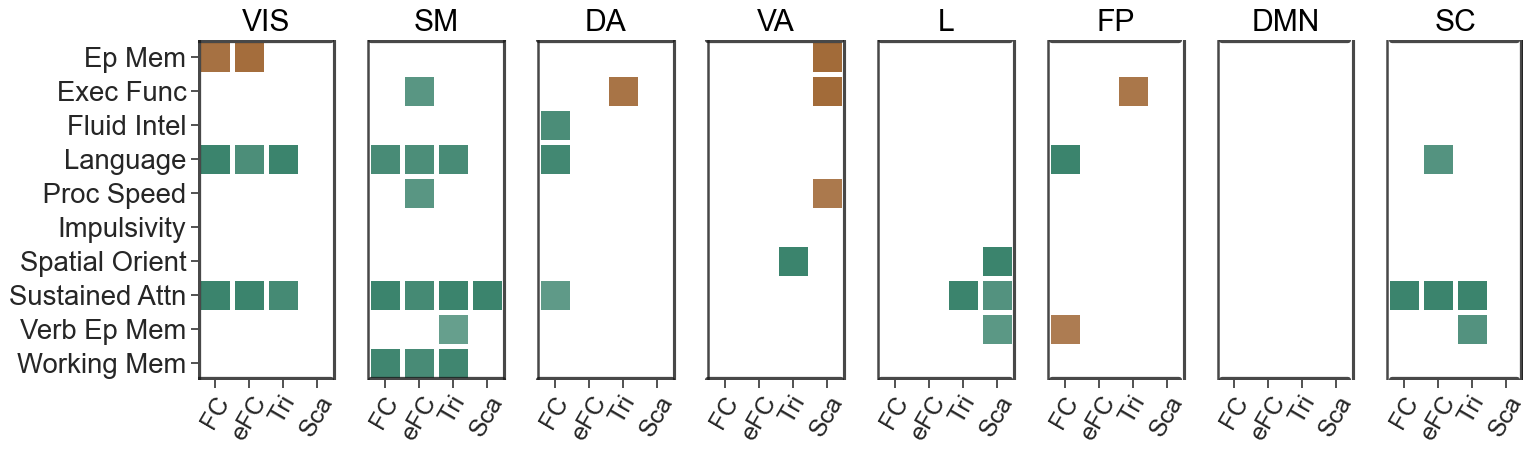

In [103]:
fig=plt.figure(dpi=90,figsize=(20,5))
ax=plt.subplot(111)
cmap = sns.diverging_palette(400, 160, as_cmap=True)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
data_to_plot=-np.array(list_saliences_mean).T
data_to_plot_with_white_rows=np.insert(data_to_plot,4,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,9,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,14,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,19,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,24,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,29,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,34,np.zeros(10),axis=1)
sns.axes_style("whitegrid")

list_saliences_mean_numpy=np.where(np.abs(data_to_plot_with_white_rows)>=0.35,data_to_plot_with_white_rows,np.nan)
sns.heatmap(list_saliences_mean_numpy,cmap=cmap, vmax=.5,vmin=-.5,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=2.5, cbar_kws={"shrink": .5}, cbar=False)

plt.yticks(np.arange(0.5,10.5),['Ep Mem','Exec Func','Fluid Intel','Language',' Proc Speed',
                            'Impulsivity','Spatial Orient','Sustained Attn','Verb Ep Mem', 'Working Mem'],rotation=0);

plt.text(x=2,y=-0.5,s="VIS", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=7,y=-0.5,s="SM", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=12,y=-0.5,s="DA", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=17,y=-0.5,s="VA", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=22,y=-0.5,s="L", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=27,y=-0.5,s="FP", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=32,y=-0.5,s="DMN", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=37,y=-0.5,s="SC", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font);


# plt.xticks(np.arange(0.5,40.5,1),np.arange(40),rotation=90)
# plt.xticks(np.arange(0.5,40.5,1),[""]*40,rotation=90)
aaa=[0.5,1.5,2.5,3.5]
total_list=[]
total_list.extend(aaa)
for l in range(5,36,5):
    total_list.extend([l+i for i in aaa])
    
plt.xticks(total_list,['FC','eFC','Tri','Sca']*8,rotation=60,fontsize=20,ha="center")
# plt.

alpha_val=0.8
# ax.axhline(y=0, xmin=0,xmax=10,color='k',linewidth=5,zorder=10)
# ax.axhline(y=list_saliences_mean_numpy.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=5,alpha=alpha_val)
ax.axvline(x=4, color='k',linewidth=2.5,alpha=alpha_val)
ax.axhline(y=10, xmin=0,xmax=0.1,color='k',linewidth=5,zorder=10,alpha=alpha_val)
ax.axhline(y=0, xmin=0,xmax=0.1,color='k',linewidth=5,zorder=10,alpha=alpha_val)


for i in range(1,4):
    ax.axvline(x=4*i+i, color='k',linewidth=2,alpha=alpha_val)#vertical lines
    ax.axvline(x=4*(i+1)+i, color='k',linewidth=2.5,alpha=alpha_val) #vertical lines
    ax.axhline(y=10, xmin=i*0.13-(i-1)*0.0025,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
    ax.axhline(y=0, xmin=i*0.13-(i-1)*0.0025,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
#     ax.axhline(y=10, xmin=4*(0.025)*i+i*0.027,xmax=0.225,color='k',linewidth=5,zorder=10)

for i in range(4,8):
    ax.axvline(x=4*i+i, color='k',linewidth=2,alpha=alpha_val)#vertical lines
    ax.axvline(x=4*(i+1)+i, color='k',linewidth=2.5,alpha=alpha_val) #vertical lines
    ax.axhline(y=10, xmin=i*0.13-(i-1)*0.0015,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
    ax.axhline(y=0, xmin=i*0.13-(i-1)*0.0015,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)

ax.axvline(x=39, color='k',linewidth=5,alpha=alpha_val)#vertical lines
# ax.xaxis.tick_top() # x axis on top
# ax.xaxis.set_label_position('top')
# ax.axhline(y=10, xmin=0.13,xmax=0.225,color='k',linewidth=5,zorder=10)
# ax.axhline(y=10, xmin=0.255,xmax=0.3525,color='k',linewidth=5,zorder=10)
# ax.axhline(y=10, xmin=0.38,xmax=0.4800,color='k',linewidth=5,zorder=10)



<ipython-input-98-99208ba4272e>:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


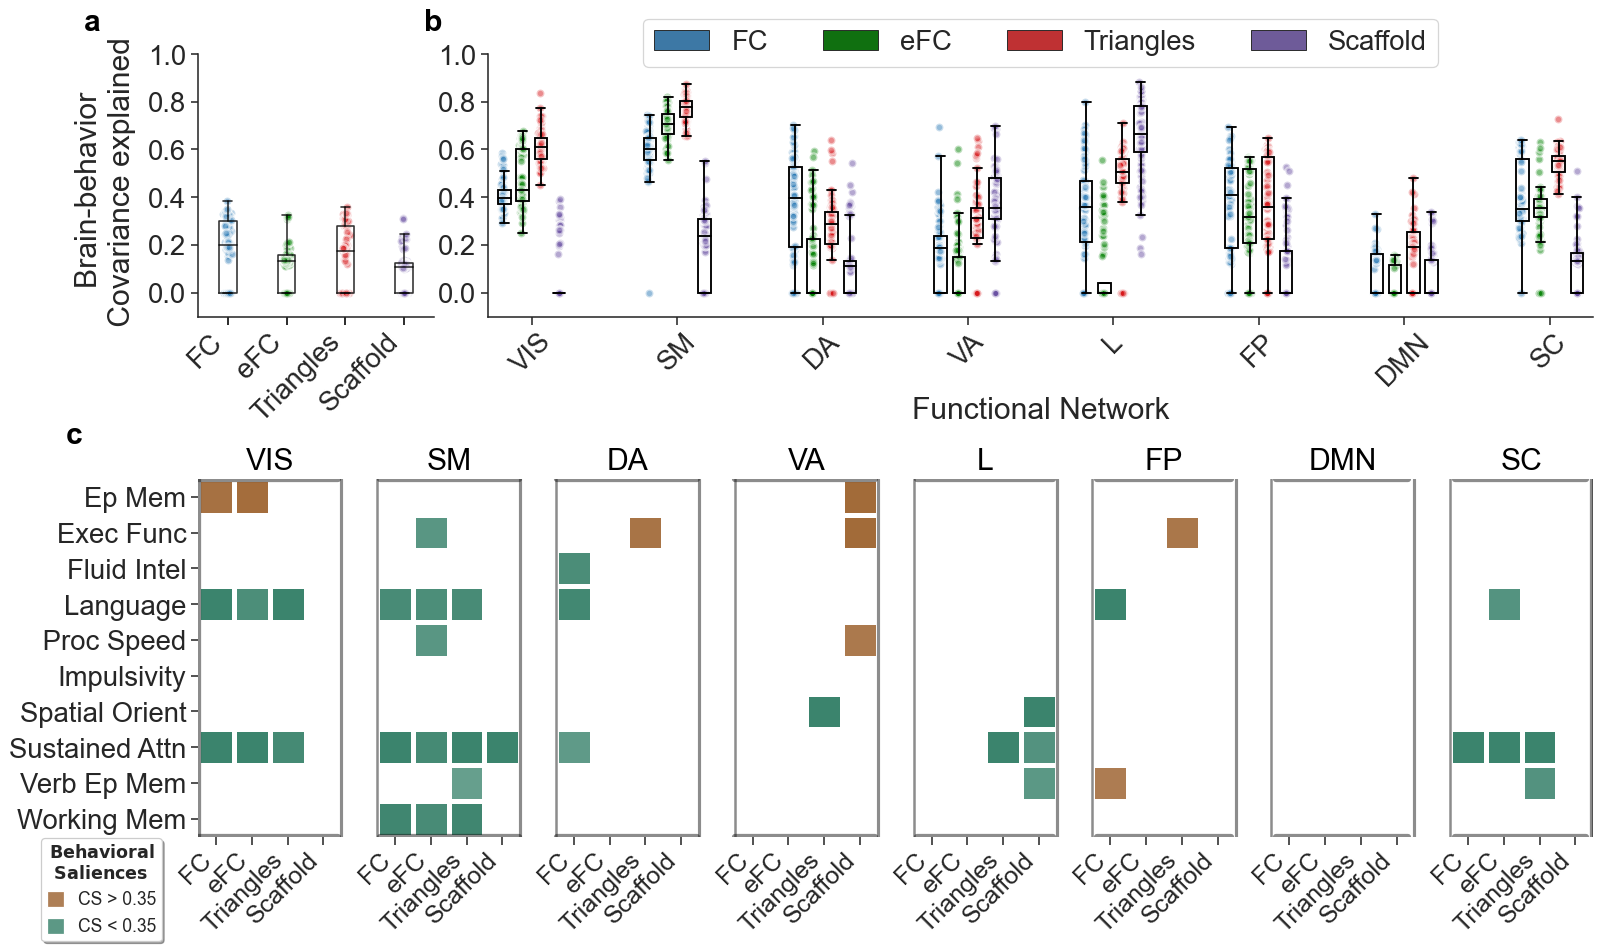

In [98]:
from matplotlib.gridspec import GridSpec
font = {'family': 'sans-serif',
        'fontname':'Arial',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }

fig=plt.figure(dpi=90,figsize=(20,12))
gs = GridSpec(2, 10, figure=fig,hspace=0.4,wspace=0.6,top=1.25,bottom=0.5,height_ratios=[0.35,0.55])

width_box=0.3
ax = fig.add_subplot(gs[0, 0:2])

sns.despine(fig=fig,right=True)
plt.xticks([0.5,1.5,2.5,3.5],['FC','eFC','Triangles','Scaffold'],rotation=45,ha='right')
plt.xlim(0,4)
plt.ylim(-0.1,1)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel('Brain-behavior \n Covariance explained',fontsize=24,labelpad=10)

blp=plt.boxplot([data_behaviour_covariance_all['BOLD'],
             data_behaviour_covariance_all['edges'],
             data_behaviour_covariance_all['triangles'],
             data_behaviour_covariance_all['scaffold']],labels=['FC','eFC','Triangles','Scaffold'],
             widths=width_box, showfliers=False,showcaps=True,positions=[0.5,1.5,2.5,3.5])

alpha_box=0.8


alpha_val=0.5
size_marker=40
lw_box=1.3
#Triangle points
plt.scatter(np.random.normal(1.-0.5,0.03,size=len(data_behaviour_covariance_all['BOLD'])),data_behaviour_covariance_all['BOLD'],
            s=size_marker,color='#2C7BB6',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

plt.scatter(np.random.normal(2.-0.5,0.03,size=len(data_behaviour_covariance_all['edges'])),data_behaviour_covariance_all['edges'],
            s=size_marker,color='green',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)


plt.scatter(np.random.normal(3.-0.5,0.03,size=len(data_behaviour_covariance_all['triangles'])),data_behaviour_covariance_all['triangles'],
            s=size_marker,color='#D7191C',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

plt.scatter(np.random.normal(4.-0.5,0.03,size=len(data_behaviour_covariance_all['scaffold'])),data_behaviour_covariance_all['scaffold'],
            s=size_marker,color='#6a51a3',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)




set_box_color(blp, 'black',lw_box,alpha_box) # colors are from http://colorbrewer2.org/
set_box_color(blp, 'black',lw_box,alpha_box)
set_box_color(blp, 'black',lw_box,alpha_box)


plt.text(x=-0.45,y=1.12,s="a", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes)


ax = fig.add_subplot(gs[0, 2:])
sns.set( font_scale=2)
sns.set_style("ticks")
data_all_networks_no_umap=data_all_networks[~data_all_networks.method.str.contains('UMAP',case=False)]
data_all_networks_umap=data_all_networks[data_all_networks.method.str.contains('UMAP',case=False)]

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

# order_indices=pd.Index(['BOLD','edges','triangles','scaffold','BOLD_UMAP','edges_UMAP','triangles_UMAP','scaffold_UMAP'])
order_indices=pd.Index(['FC','eFC','Triangles','Scaffold'])
# sns.boxplot(data=data_all_networks,x='method',y='Covariance Explained',hue='network',order=order_indices,showfliers = False)
sns.boxplot(data=data_all_networks_no_umap,x='network',y='Covariance Explained',hue='method',
            showfliers = False,hue_order=order_indices,width=0.5,
           palette=sns.color_palette(mypalette_vivid, 14),**PROPS)



# sns.stripplot(data=data_all_networks_no_umap, x='network',y='Covariance Explained',hue='method',
#               hue_order=order_indices, dodge=True, ax=ax,alpha=alpha_val,palette=sns.color_palette(mypalette_vivid, 4),
#               legend=False,clip_on=False,jitter=0.05,
#                marker='o', size=6, edgecolor='white', linewidth=1, color='white',zorder=-20)

for x_coord,network in zip([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],['VIS','SM','DA','VA','L','FP','DMN','SC']):
    plt.scatter(np.random.normal(x_coord-0.7,0.005,size=len(data_behaviour_covariance_all_networks['BOLD'][network])),data_behaviour_covariance_all_networks['BOLD'][network],
            s=size_marker,color='#2C7BB6',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.57,0.005,size=len(data_behaviour_covariance_all_networks['edges'][network])),data_behaviour_covariance_all_networks['edges'][network],
            s=size_marker,color='green',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.44,0.005,size=len(data_behaviour_covariance_all_networks['triangles'][network])),data_behaviour_covariance_all_networks['triangles'][network],
            s=size_marker,color='#D7191C',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)

    plt.scatter(np.random.normal(x_coord-0.31,0.005,size=len(data_behaviour_covariance_all_networks['scaffold'][network])),data_behaviour_covariance_all_networks['scaffold'][network],
            s=size_marker,color='#6a51a3',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=2)



sns.despine(fig=fig,right=True)
# sns.set_style("ticks",{'axes.grid' : True})
#sns.set_style("whitegrid")

plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.xticks(rotation=45);
plt.xlim(-0.3,7.3)
plt.ylim(-0.1,1)
plt.ylabel("")
# adjust_box_widths(fig, 0.9)
plt.xlabel('Functional Network')

plt.text(x=-0.05,y=1.12,s="b", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes)

new_adjust_box_widths(ax,fac=0.7)
plt.legend(loc='lower center',bbox_to_anchor=(0.5,0.9),ncols=4)

ax = fig.add_subplot(gs[1,:])
sns.set( font_scale=2)
sns.set_style("ticks")
sns.despine(fig=fig,right=True)


# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(400, 160, as_cmap=True)


data_to_plot=-np.array(list_saliences_mean).T
data_to_plot_with_white_rows=np.insert(data_to_plot,4,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,9,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,14,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,19,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,24,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,29,np.zeros(10),axis=1)
data_to_plot_with_white_rows=np.insert(data_to_plot_with_white_rows,34,np.zeros(10),axis=1)
sns.axes_style("whitegrid")


list_saliences_mean_numpy=np.where(np.abs(data_to_plot_with_white_rows)>=0.35,data_to_plot_with_white_rows,np.nan)
sns.heatmap(list_saliences_mean_numpy,cmap=cmap, vmax=.5,vmin=-.5,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=2.5, cbar_kws={"shrink": .5}, cbar=False)

plt.yticks(np.arange(0.5,10.5),['Ep Mem','Exec Func','Fluid Intel','Language',' Proc Speed',
                            'Impulsivity','Spatial Orient','Sustained Attn','Verb Ep Mem', 'Working Mem'],rotation=0);

plt.text(x=2,y=-0.5,s="VIS", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=7,y=-0.5,s="SM", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=12,y=-0.5,s="DA", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=17,y=-0.5,s="VA", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=22,y=-0.5,s="L", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=27,y=-0.5,s="FP", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=32,y=-0.5,s="DMN", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font)

plt.text(x=37,y=-0.5,s="SC", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='normal',fontdict=font);


# plt.xticks(np.arange(0.5,40.5,1),np.arange(40),rotation=90)
# plt.xticks(np.arange(0.5,40.5,1),[""]*40,rotation=90)
aaa=[0.5,1.5,2.5,3.5]
total_list=[]
total_list.extend(aaa)
for l in range(5,36,5):
    total_list.extend([l+i for i in aaa])
    
plt.xticks(total_list,['FC','eFC','Triangles','Scaffold']*8,rotation=45,fontsize=20,ha="right")
# plt.

alpha_val=0.5
# ax.axhline(y=0, xmin=0,xmax=10,color='k',linewidth=5,zorder=10)
# ax.axhline(y=list_saliences_mean_numpy.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=5,alpha=alpha_val)
ax.axvline(x=4, color='k',linewidth=2.5,alpha=alpha_val)
ax.axhline(y=10, xmin=0,xmax=0.1,color='k',linewidth=5,zorder=10,alpha=alpha_val)
ax.axhline(y=0, xmin=0,xmax=0.1,color='k',linewidth=5,zorder=10,alpha=alpha_val)


for i in range(1,4):
    ax.axvline(x=4*i+i, color='k',linewidth=2,alpha=alpha_val)#vertical lines
    ax.axvline(x=4*(i+1)+i, color='k',linewidth=2.5,alpha=alpha_val) #vertical lines
    ax.axhline(y=10, xmin=i*0.13-(i-1)*0.0025,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
    ax.axhline(y=0, xmin=i*0.13-(i-1)*0.0025,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
#     ax.axhline(y=10, xmin=4*(0.025)*i+i*0.027,xmax=0.225,color='k',linewidth=5,zorder=10)

for i in range(4,8):
    ax.axvline(x=4*i+i, color='k',linewidth=2,alpha=alpha_val)#vertical lines
    ax.axvline(x=4*(i+1)+i, color='k',linewidth=2.5,alpha=alpha_val) #vertical lines
    ax.axhline(y=10, xmin=i*0.13-(i-1)*0.0015,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)
    ax.axhline(y=0, xmin=i*0.13-(i-1)*0.0015,xmax=0.23+(i-1)*0.1275,color='k',linewidth=5,zorder=10,alpha=alpha_val)

ax.axvline(x=39, color='k',linewidth=5,alpha=alpha_val)#vertical lines



plt.text(x=-0.089,y=1.12,s="c", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes);

import matplotlib.patches as mpatches


# specify the location of (left,bottom),width,height
# rect=mpatches.Rectangle((-4,10.5),0.6,0.6, 
#                         fill = True,
#                         color = "purple",
#                         linewidth = 1,clip_on=False)
# plt.gca().add_patch(rect)

# rect=mpatches.Rectangle((-4,10.5),0.6,0.6, 
#                         fill = True,
#                         color = "purple",
#                         linewidth = 1,clip_on=False)
# plt.gca().add_patch(rect)

# red_patch = mpatches.Patch(color='red', label='The red data')

greater_patch = mpatches.Rectangle((0,0), 1, 1, facecolor='#ae7f56ff', label='> 0.35')
lower_patch = mpatches.Rectangle((0,0), 1, 1, facecolor='#5c9885ff', label='< 0.35')
legend=plt.legend(labels=['CS > 0.35', 'CS < 0.35'],handles=[greater_patch,lower_patch],
                  bbox_to_anchor=(-0.02,0.02),title=r'$\bf{Behavioral}$'+'\n'+r' $\bf{Saliences}$',
                  handleheight=1,handlelength=1,fontsize=14,
                  shadow=True, borderpad=0.3)
legend.get_title().set_fontsize('14') #legend 'Title' fontsize
plt.tight_layout()
plt.savefig('figure4_final.pdf',dpi=300,bbox_inches='tight')
#plt.savefig('fig5.svg')